##  Lab 1: Basic Python and Jupyter Notebook Setup
#### (0 points)

### Objective
Set up Python and Jupyter Notebook for machine learning tasks.

### Instructions
1. Install Python (version 3.x) from [python.org](https://www.python.org/).
2. Install Jupyter Notebook using the command:  
   ```sh
   pip install notebook
   ```
3. Create a new Jupyter Notebook and practice basic Python commands like variables, loops, functions, and libraries.
4. Install essential libraries like NumPy, Pandas, Matplotlib, and Scikit-learn using:
   ```sh
   pip install numpy pandas matplotlib scikit-learn torch torchvision
   ```

### Deliverables
- Submit a notebook file containing basic Python operations and a short description of each step.


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader

In [ ]:
# Your implementation goes here


##  Lab 2: Implementing Ensemble Models (Random Forest, XGBoost)
#### (33.33 points)

### Objective
Implement and compare ensemble models like Random Forest and XGBoost.

### Instructions
1. Use the Scikit-learn library to load a dataset Breast Cancer dataset.
2. Implement a Random Forest classifier using `RandomForestClassifier` from Scikit-learn. Evaluate its accuracy, precision, recall, f1 using cross-validation.
3. Install XGBoost using:
   ```sh
   pip install xgboost
   ```
4. Implement an XGBoost classifier and compare its performance with Random Forest.


In [ ]:
### YOUR CODE HERE ###

## Lab 3: Building Neural Networks with PyTorch
#### (33.33 points)

In [15]:
# Generate synthetic data for nonlinear regression
np.random.seed(42)
X_nonlinear = np.random.rand(100, 1) * 10  # Features
y_nonlinear = np.sin(X_nonlinear) + 0.1 * np.random.randn(100, 1)  # Nonlinear relationship with noise

# Train-test split
X_train_nl, X_test_nl, y_train_nl, y_test_nl = train_test_split(X_nonlinear, y_nonlinear, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor_nl = torch.tensor(X_train_nl, dtype=torch.float32)
y_train_tensor_nl = torch.tensor(y_train_nl, dtype=torch.float32)
X_test_tensor_nl = torch.tensor(X_test_nl, dtype=torch.float32)
y_test_tensor_nl = torch.tensor(y_test_nl, dtype=torch.float32)

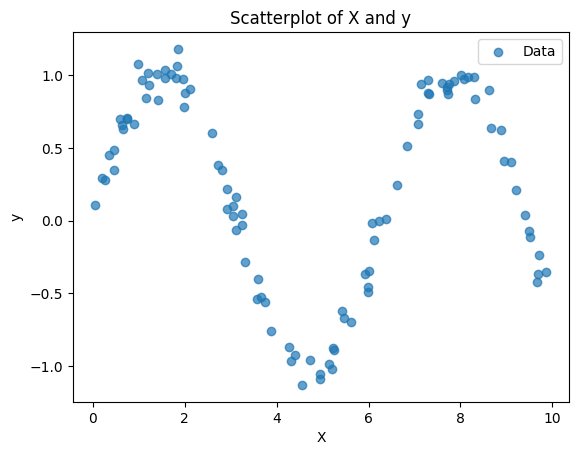

In [16]:
# Scatterplot of X and y
plt.scatter(X_nonlinear, y_nonlinear, alpha=0.7, label="Data")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Scatterplot of X and y")
plt.legend()
plt.show()

In [ ]:
# Define the deep neural network model
class DeepNNRegressionModel(nn.Module):
    def __init__(self):
        super(DeepNNRegressionModel, self).__init__()
        ### YOUR CODE HERE ###

    def forward(self, x):
        ### YOUR CODE HERE ###

model_dnn = DeepNNRegressionModel()
criterion_dnn = #### YOUR CODE HERE ####
learning_rate = #### YOUR CODE HERE ####
optimizer_dnn = optim.Adam(model_dnn.parameters(), lr=learning_rate)

Calculate the number of parameters of your network and interprete why you chose such a model with such a learning rate

In [ ]:
# Train the deep neural network regression model
epochs = #### YOUR CODE HERE ####
train_loss_history_dnn = []
test_loss_history_dnn = []

for epoch in range(epochs):
    # Training phase
    model_dnn.train()
    optimizer_dnn.zero_grad()
    y_pred_train_dnn = model_dnn(X_train_tensor_nl)
    loss_dnn = criterion_dnn(y_pred_train_dnn, y_train_tensor_nl)
    loss_dnn.backward()
    optimizer_dnn.step()

    # Evaluation phase
    model_dnn.eval()
    with torch.no_grad():
        y_pred_test_dnn = model_dnn(X_test_tensor_nl)
        test_loss_dnn = criterion_dnn(y_pred_test_dnn, y_test_tensor_nl).item()
        train_loss_history_dnn.append(loss_dnn.item())
        test_loss_history_dnn.append(test_loss_dnn)

        # Calculate R² scores
        train_r2_dnn = r2_score(y_train_tensor_nl.numpy(), y_pred_train_dnn.numpy())
        test_r2_dnn = r2_score(y_test_tensor_nl.numpy(), y_pred_test_dnn.numpy())

    print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {loss_dnn.item():.4f}, Test Loss: {test_loss_dnn:.4f}, Train R²: {train_r2_dnn:.4f}, Test R²: {test_r2_dnn:.4f}")

In [ ]:
# Plot the training and testing loss history
plt.plot(train_loss_history_dnn, label="Train Loss")
plt.plot(test_loss_history_dnn, label="Test Loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss History for Deep Neural Network")
plt.show()

Interprete the loss history. Is it good? Why?

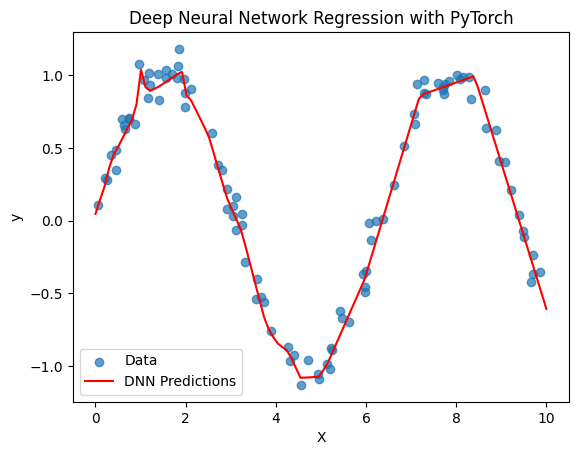

In [ ]:
# Plot the data and the deep neural network predictions and receive a result close the plot below
model_dnn.eval()
with torch.no_grad():
    X_full_dnn = np.linspace(0, 10, 100).reshape(-1, 1)
    X_full_tensor_dnn = torch.tensor(X_full_dnn, dtype=torch.float32)
    y_pred_full_dnn = model_dnn(X_full_tensor_dnn).numpy()

plt.scatter(X_nonlinear, y_nonlinear, label="Data", alpha=0.7)
plt.plot(X_full_dnn, y_pred_full_dnn, color="red", label="DNN Predictions")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Deep Neural Network Regression with PyTorch")
plt.show()

# Lab 4: Implementing Convolutional Neural Networks (CNNs) with PyTorch
#### (33.33 points)

### Objective
#### Implement LeNet for CIFAR-10 with 3 input channels

Build a CNN for image classification using PyTorch. 

### Instructions
1. Load the CIFAR-10 dataset using `torchvision.datasets`.
2. Implement LeNet - CNN architecture with convolutional layers, pooling layers, and fully connected layers using torch
3. Train the CNN on the dataset and evaluate its performance.


In [7]:
# Your implementation goes here
import torch
import torchvision
import torchvision.transforms as transforms

# Define transformations for the training and testing sets
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load training and testing datasets
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)

# Define the classes in CIFAR-10
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [ ]:
# Implement LeNet for CIFAR-10 with 3 input channels
class LeNetCIFAR10(nn.Module):
    def __init__(self):
        super(LeNetCIFAR10, self).__init__()
        ### YOUR CODE HERE ###

    def forward(self, x):
        # Conv2d->Relu->AvgPool2d ---- (3, 32, 32) → (6, 28, 28) → (6, 14, 14)
        # Conv2d->Relu->AvgPool2d ---- (6, 14, 14) → (16, 10, 10) → (16, 5, 5)
        # Flatten
        # Linear->Relu->Linear->Relu->Linear

        ### YOUR CODE HERE ###
        return x

net = LeNetCIFAR10()

criterion = #### YOUR CODE HERE ####                
optimizer = optim.Adam(net.parameters(), lr=0.001)  # Adam optimizer


Calculate the number of parameters of your network

In [ ]:
num_epochs = #### YOUR CODE HERE ####
for epoch in range(num_epochs):  # Number of epochs
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()               # Zero the parameter gradients
        outputs = net(inputs)               # Forward pass
        loss = criterion(outputs, labels)   # Compute loss
        loss.backward()                     # Backward pass
        optimizer.step()                    # Optimize

        running_loss += loss.item()
        if i % 100 == 99:  # Print every 100 mini-batches
            print(f'[Epoch {epoch + 1}, Batch {i + 1}] loss: {running_loss / 100:.3f}')
            running_loss = 0.0

print('Finished Training')


In [12]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)  # Get predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on the 10000 test images: {100 * correct / total:.2f}%')


Accuracy on the 10000 test images: 53.46%


In [ ]:
from sklearn.metrics import classification_report

# Assuming 'net' is your trained model
net.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in testloader:
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Generate classification report
report = classification_report(all_labels, all_preds, target_names=classes)
print(report)


Interpret your results. Why do you think your solution worked? In case not good, then why your algorithm failed? What can be improved?

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to show images
def imshow(img):
    img = img / 2 + 0.5     # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random test images
dataiter = iter(testloader)
images, labels = next(dataiter)

# Print images
imshow(torchvision.utils.make_grid(images[:4]))
print('GroundTruth:', ' '.join(f'{classes[labels[j]]}' for j in range(4)))

# Predict
outputs = net(images[:4])
_, predicted = torch.max(outputs, 1)
print('Predicted:', ' '.join(f'{classes[predicted[j]]}' for j in range(4)))


## Lab 5: Optional - Implementing Recurrent Neural Networks (RNNs) with PyTorch (0 bonus points)
####

### Objective
Build an RNN for time-series or text data analysis.

### Instructions
1. Choose a time-series dataset (e.g., stock prices) or a text dataset (e.g., sentiment analysis dataset).
2. Implement an RNN architecture using LSTM or GRU layers from PyTorch’s `torch.nn` module.
3. Train the RNN and evaluate its performance on the dataset.

### Deliverables
- Submit a notebook file with the RNN implementation and its performance evaluation.


In [ ]:
# Your implementation goes here
